In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [ ]:
''' converts from '.csv' file to a numpy array '''
def extractData(s):
  data_df = pd.read_csv(s, header = None)
  return data_df.to_numpy()

In [ ]:
''' seperates the first column of a np array as index / serial numbers'''
def seperateFeatures(data):
  return data[:,1:], data[:,0]

In [ ]:
''' returns np array with sigmoid value of each entry : sigmoid(x) = 1/(1+exp(-x)) '''
def sigmoid (data):
  return (1/(1 + np.exp(-data)))

In [ ]:
''' returns np array with inverse of sigmoid value of each entry'''
def sigmoidInverse(data):
  return -(np.log((1/data)-1))

In [ ]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [ ]:
''' returns np array with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  mean = np.mean(data, axis=0)

  std = np.std(data, axis=0)
  for i in range(std.size):
    std[i] = 1 if (std[i] == False) else (std[i] == std[i])
    
  return ((data - np.mean(data, axis=0))/std)

In [ ]:
'''Calculates accuracy as (number of correct predictions) *100/(total number of predictions)'''
def accuracy(h, y):
  m = y.size
  count = 0
  for i in range(m):
    if (h[i] == y[i]):
      count+=1
  return (count*100)/m

In [ ]:
#################################################################################################################################################################################

In [ ]:
'''calculates loss for logistic regression'''
def logisticCost(y, hypothesis):
  m = y.size
  cost = -((1/m)*np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis)))
  return cost

In [ ]:
'''calculates  gradient for logistic regression'''
def logisticGrad(X, y, hypothesis, reg_coeff, theta):
  m = y.shape[0]
  k = theta.shape[1]
  theta_c = theta.copy()
  theta_c[0] = np.zeros((1,k))
  grad = (1/m)*(X.T@(hypothesis - y) + reg_coeff*theta_c)
  return grad

In [ ]:
'''Converts vector with each entry representing class number to probability matrix with zeros and ones'''
def vectorToMatrix(y, num_class):
  m = y.size
  Y = np.zeros((m, num_class))
  count = 0
  for i in y:
    Y[count][i-1] = 1
    count +=1
  
  return Y

In [ ]:
'''Converts probability matrix to vector with each entry representing class number'''
def matrixToVector(a):
  y = np.argmax(a, axis=1)+1
  y.shape = (y.size, 1)
  return y

In [ ]:
def train(X_train, y_train, num_iter, num_class, alpha, reg_coeff):

  '''
  X_train     --> design matrix (before adding features)
  y_train     --> target value / true result (m x 1)
  num_iter    --> number of iteration (int)
  alpha       --> learning rate
  reg_coeff   --> regularisation coefficient
  '''
  
  m, n = X_train.shape
  # m --> number of trainig examples
  # n --> number of features 

  #Converting vector y to probability matrix Y
  Y = vectorToMatrix(y_train, num_class)

  #Scaling and adding bias term to training design matrix
  X_train = meanScaling(X_train)
  X = addBias(X_train)

  #initializing losses
  losses = []

  #initializing theta
  theta = np.zeros((n+1,num_class))

  #training loop
  for i in range(num_iter):

    hypothesis = sigmoid(X@theta)

    #calculating and appending losses
    losses.append(logisticCost(Y, hypothesis))

    #calculating gradient
    grad = logisticGrad(X, Y, hypothesis, reg_coeff, theta)

    #updating theta
    theta -= alpha*grad

    print(losses[i])

  plt.plot(losses)
  return theta

In [ ]:
def predict(X, y, theta, num_class):

  '''
  X           --> Design matrix of features of testing data
  y           --> Target value vector of testing data
  theta       --> parameter obtained after training
  num_classes --> number of classes
  '''

  m = X.shape[0]
  # m = number of testing examples

  # scaling and adding bias to test design matrix
  X = meanScaling(X)
  X = addBias(X)

  hypothesis = sigmoid(X@theta)

  #converting y vector to probability matrix Y
  Y = vectorToMatrix(y, num_class)

  #calculating loss
  loss = logisticCost(Y, hypothesis)
  print("loss = ", loss)
  
  #converting hypothesis (probability matrix) to class vector
  y_predicted = matrixToVector(hypothesis)
  
  print("Accuracy = ", accuracy(y_predicted, y))

  return y_predicted

In [17]:
data_train = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-train.csv')
X_train, y_train = seperateFeatures(data_train)

In [18]:
data_test = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-test.csv')
X_test, y_test = seperateFeatures(data_test)

0.6931471805599466
0.6830710934483901
0.6809364430804256
0.680050286160313
0.6794280891499384
0.6790564571101669
0.6787192484876725
0.6784975130586225
0.6782764935801172
0.6781238320675959
0.6779651939767952
0.6778518666158947
0.6777315725789429
0.677643350061231
0.677548561189378
0.6774775108654685
0.6774006107444912
0.677341877778395
0.6772780289364378
0.6772284530570118
0.6771744280656862
0.6771318575262697
0.6770854185424331
0.6770483352171018
0.6770078803485158
0.6769751808251626
0.6769395319113942
0.6769103934492692
0.6768786635031655
0.6768524588854301
0.6768239664962908
0.676800208263405
0.6767744207009826
0.6767527236290393
0.6767292180278263
0.6767092732536876
0.6766877094957356
0.6766692662619679
0.6766493676160273
0.6766322201159545
0.6766137591371695
0.6765977368480162
0.6765805249220204
0.6765654853732364
0.6765493648356509
0.6765351881108452
0.6765200262206386
0.6765066107165936
0.6764922949868577
0.6764795540997633
0.6764659886379937
0.6764538481444459
0.676440950754291

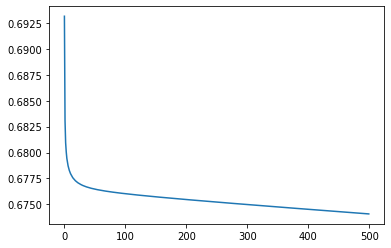

In [19]:
theta = train(X_train, y_train, 500, 26, 2e-5, 0.1)

In [21]:
h = predict(X_train, y_train, theta, 26)

loss =  0.6740729595153818
Accuracy =  57.792792792792795
